# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data:

In [2]:
df = pd.read_csv(r"C:\Users\dell6\OneDrive\Desktop\Yashu jobs\By Yashu\Alfido Tech\Tasks\Task 2 UberDataset.csv")

# Data Exploration:

#### First five rows of the dataset:

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### About data:

#### Shape of the dataset:

In [4]:
df.shape

(1156, 7)

#### Columns in the dataset:

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

#### Data type of columns:

In [6]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

#### Summary of the Numeric data:

In [7]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Data Cleaning:

#### Duplicate values:

In [8]:
df[df.duplicated()==True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

#### Noise Values:

In [11]:
for i in df:
    print(i, df[i].sort_values().unique(), '\n')

START_DATE ['01-01-2016 21:11' '01-02-2016 01:25' '01-02-2016 20:25' ...
 '9/30/2016 17:39' '9/30/2016 20:59' 'Totals'] 

END_DATE ['01-01-2016 21:17' '01-02-2016 01:37' '01-02-2016 20:38' ...
 '9/30/2016 20:20' '9/30/2016 22:34' nan] 

CATEGORY ['Business' 'Personal' nan] 

START ['Agnew' 'Almond' 'Apex' 'Arabi' 'Arlington' 'Arlington Park at Amberly'
 'Asheville' 'Austin' 'Banner Elk' 'Bellevue' 'Berkeley' 'Boone'
 'Briar Meadow' 'Bryson City' 'Burtrose' 'CBD' 'Capitol One' 'Cary'
 'Central' 'Chalmette' 'Chapel Hill' 'Chessington' 'College Avenue'
 'Colombo' 'Columbia Heights' 'Congress Ave District' 'Connecticut Avenue'
 'Convention Center District' 'Cory' 'Couples Glen' 'Covington' 'Coxville'
 'Daytona Beach' 'Downtown' 'Durham' 'Eagan Park' 'Eagle Rock'
 'East Austin' 'East Elmhurst' 'East Harlem' 'Eastgate' 'Edgehill Farms'
 'El Cerrito' 'Elk Park' 'Elmhurst' 'Emeryville' 'Fairmont'
 'Farmington Woods' 'Fayetteville Street' 'Financial District'
 'Flatiron District' 'Florence' 'Fo

There is a Noise value in Start date column. i.e., 'Totals'

In [12]:
df[df['START_DATE']=='Totals']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [13]:
df = df.drop(df[df['START_DATE'] == 'Totals'].index)

In [14]:
df.shape

(1154, 7)

#### Null values:

In [15]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [16]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [17]:
df['PURPOSE'].fillna('Unknown', inplace=True)

In [18]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [19]:
df.shape

(1154, 7)

#### Data Types:

In [20]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [21]:
# The data types of START_DATE and END_DATE are currently appropriate, but we need to change them to datetime format.

In [22]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [23]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [24]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

# Data Visualization:

In [25]:
colors = ['blue', 'green', 'red', 'purple', 'orange']

### Miles column Distribution:

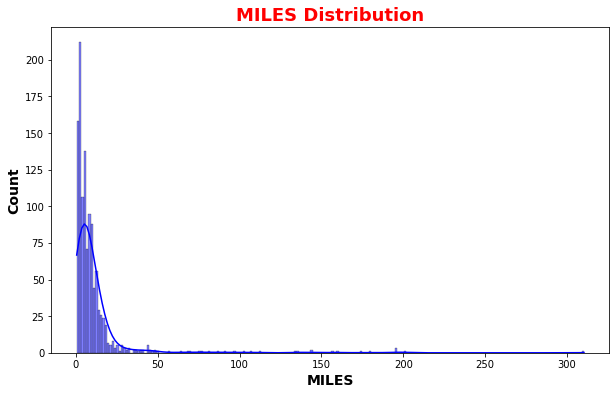

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['MILES'], kde= True, color= 'blue')

plt.xlabel('MILES', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Count', color = 'Black', fontweight='bold', fontsize=14)
plt.title('MILES Distribution', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### Category distribution

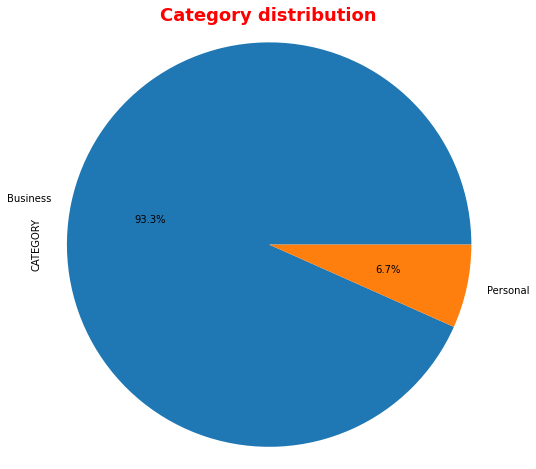

In [27]:
plt.figure(figsize=(8,8))
a = df['CATEGORY'].value_counts()
a.plot(kind='pie', labels=a.index,  autopct='%1.1f%%') 
plt.axis('equal') 
plt.title("Category distribution", color = 'red', fontweight='bold', fontsize=18)
plt.show()

### Purpose distribution:

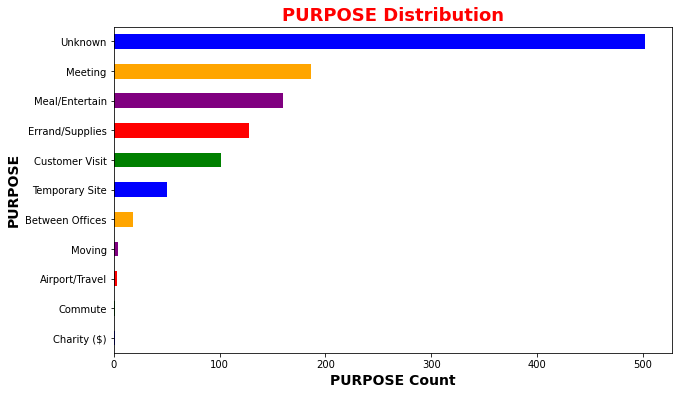

In [28]:
plt.figure(figsize=(10,6))

b = df['PURPOSE'].value_counts().sort_values()
b.plot(kind = 'barh', color = colors)

plt.xlabel('PURPOSE Count', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('PURPOSE', color = 'Black', fontweight='bold', fontsize=14)
plt.title('PURPOSE Distribution', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### Top 10 START Locations:

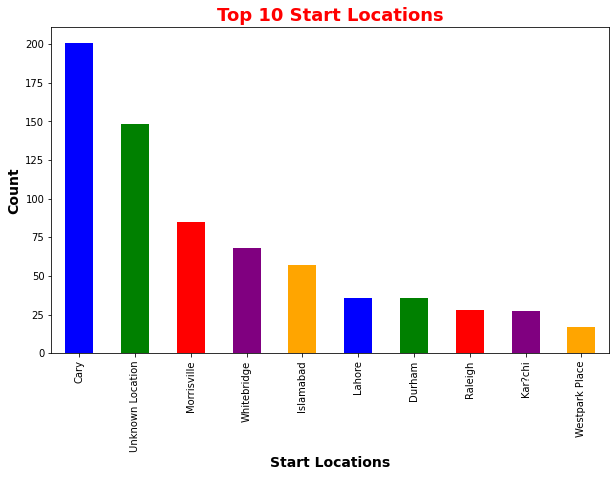

In [29]:
plt.figure(figsize=(10,6))

c = df['START'].value_counts().head(10)
c.plot(kind = 'bar', color = colors)

plt.xlabel('Start Locations', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Count', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Top 10 Start Locations', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### Top 10 Stop Locations:

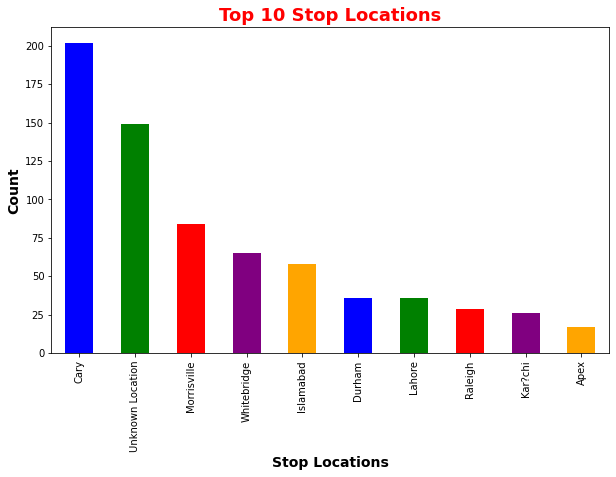

In [30]:
plt.figure(figsize=(10,6))

d = df['STOP'].value_counts().head(10)
d.plot(kind = 'bar', color = colors)

plt.xlabel('Stop Locations', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Count', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Top 10 Stop Locations', color = 'red', fontweight='bold', fontsize=18)
plt.show()

### Average Miles Per Month

In [31]:
e = df.groupby(df['START_DATE'].dt.month)['MILES'].mean().reset_index()
e

,START_DATE,MILES
0,1,8.408197
1,2,7.897391
2,3,14.990265
3,4,20.611111
4,5,7.424490
5,6,7.784112
6,7,10.933929
7,8,10.041353
8,9,16.716667
9,10,17.075472


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


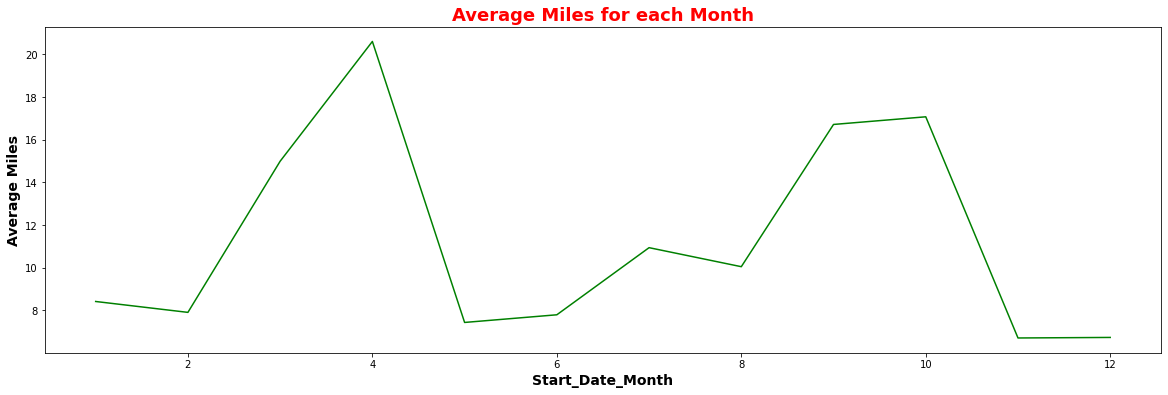

In [32]:
plt.figure(figsize=(20,6))
sns.lineplot(e['START_DATE'], e['MILES'], color = 'green')

plt.xlabel('Start_Date_Month', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Average Miles', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Average Miles for each Month', color ='red', fontweight='bold', fontsize=18)
plt.show()

### Average Miles Per Category:

In [33]:
f = df.groupby('CATEGORY')['MILES'].mean().reset_index()
f

,CATEGORY,MILES
0,Business,10.656546
1,Personal,9.320779


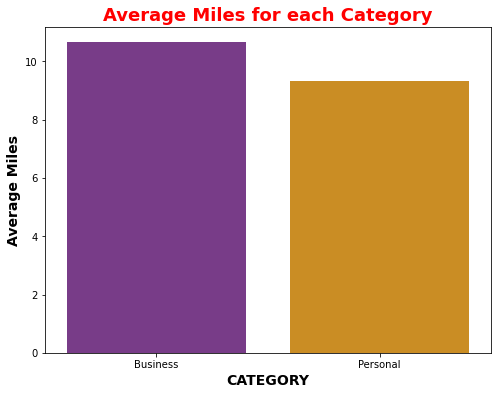

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=f, x='CATEGORY', y='MILES', palette='CMRmap')

plt.xlabel('CATEGORY', color = 'Black', fontweight='bold', fontsize=14)
plt.ylabel('Average Miles', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Average Miles for each Category', color ='red', fontweight='bold', fontsize=18)
plt.show()

### Average Miles Per Purpose:

In [35]:
g = df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending = False).reset_index()
g

,PURPOSE,MILES
0,Commute,180.200000
1,Customer Visit,20.688119
2,Meeting,15.276344
3,Charity ($),15.100000
4,Between Offices,10.944444
5,Temporary Site,10.474000
6,Unknown,9.748008
7,Meal/Entertain,5.698125
8,Airport/Travel,5.500000
9,Moving,4.550000


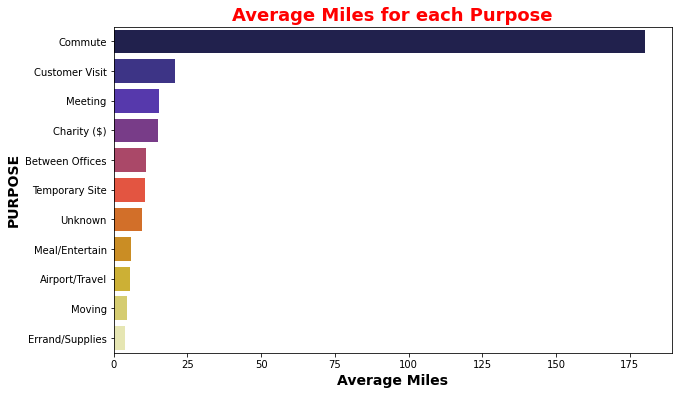

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=g, y='PURPOSE', x='MILES', palette='CMRmap')

plt.ylabel('PURPOSE', color = 'Black', fontweight='bold', fontsize=14)
plt.xlabel('Average Miles', color = 'Black', fontweight='bold', fontsize=14)
plt.title('Average Miles for each Purpose', color ='red', fontweight='bold', fontsize=18)
plt.show()